In [1]:
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt
%matplotlib notebook
                     # NOTE: all "magic" options for backend plotting are: inline, notebook, and "external" (default) 
                     # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details

<IPython.core.display.Javascript object>


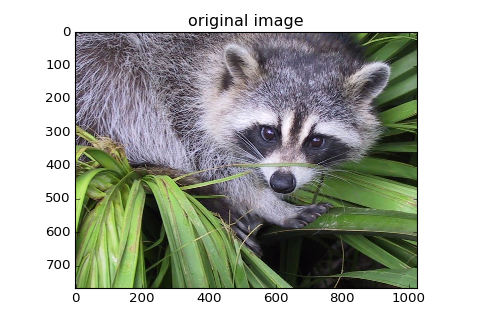

In [2]:
from scipy import misc
im = misc.face()     # a sample image in misc library
#im=image.imread("../images/IMG_3306.jpg") # another image (loaded from your file), uncomment one 

plt.figure(1,figsize = (6, 4))
plt.imshow(im,cmap="gray")
plt.title("original image")
plt.show()

# Convolution (linear filtering) 

<IPython.core.display.Javascript object>


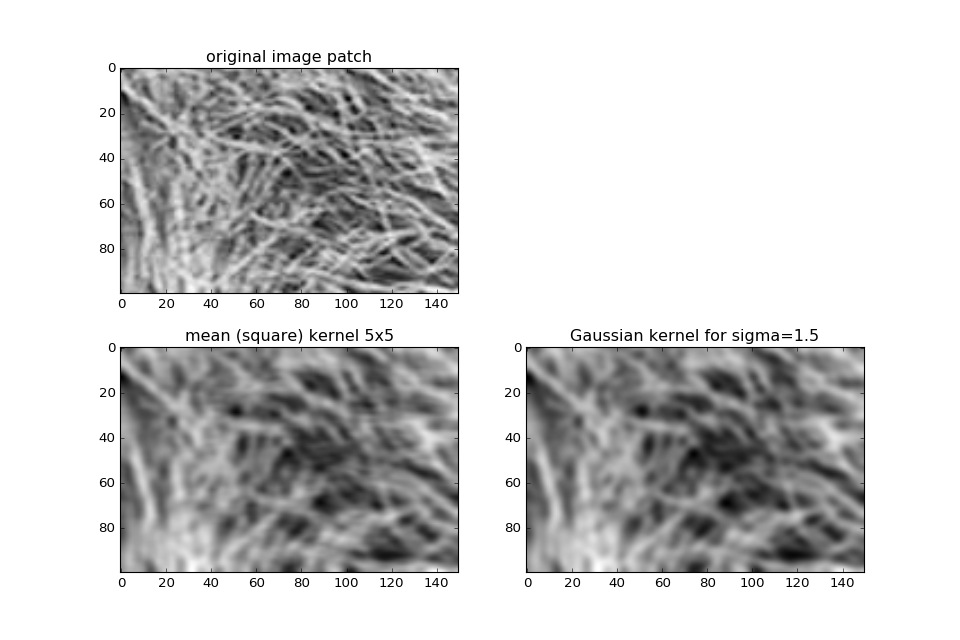

In [3]:
from scipy import ndimage, signal

mean_kernel = (1/9.) * np.array([[1.0, 1.0, 1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0, 1.0, 1.0]])

patch = im[100:200,200:350,0]

im_mean_filtered = signal.convolve2d(patch, mean_kernel, boundary='symm', mode='same')
im_gaus_filtered = ndimage.gaussian_filter(patch, sigma=1.7)

plt.figure(2,figsize = (12, 8))
plt.subplot(221)
plt.imshow(patch,cmap="gray")
plt.title("original image patch")
plt.subplot(223)
plt.imshow(im_mean_filtered,cmap="gray")
plt.title("mean (square) kernel 5x5")
plt.subplot(224)
plt.imshow(im_gaus_filtered,cmap="gray")
plt.title("Gaussian kernel for sigma=1.5")
plt.show()

# Image gradients, Canny edge detection

In [4]:
from scipy import ndimage, signal

dx = np.array([[ 0.0, 0.0, 0.0],
               [ 1.0, 0.0,-1.0],
               [ 0.0, 0.0, 0.0]])

dy = np.array([[ 0.0,-1.0, 0.0],
               [ 0.0, 0.0, 0.0],
               [ 0.0, 1.0, 0.0]])

im_blurred = ndimage.gaussian_filter(im[:,:,0], sigma=10)
im_dx = signal.convolve2d(im_blurred, dx, boundary='symm', mode='same')
im_dy = signal.convolve2d(im_blurred, dy, boundary='symm', mode='same')
grad = np.sqrt(im_dx**2 + im_dy**2)

from skimage import feature
can = feature.canny(im[:,:,0], 3.5)

<IPython.core.display.Javascript object>


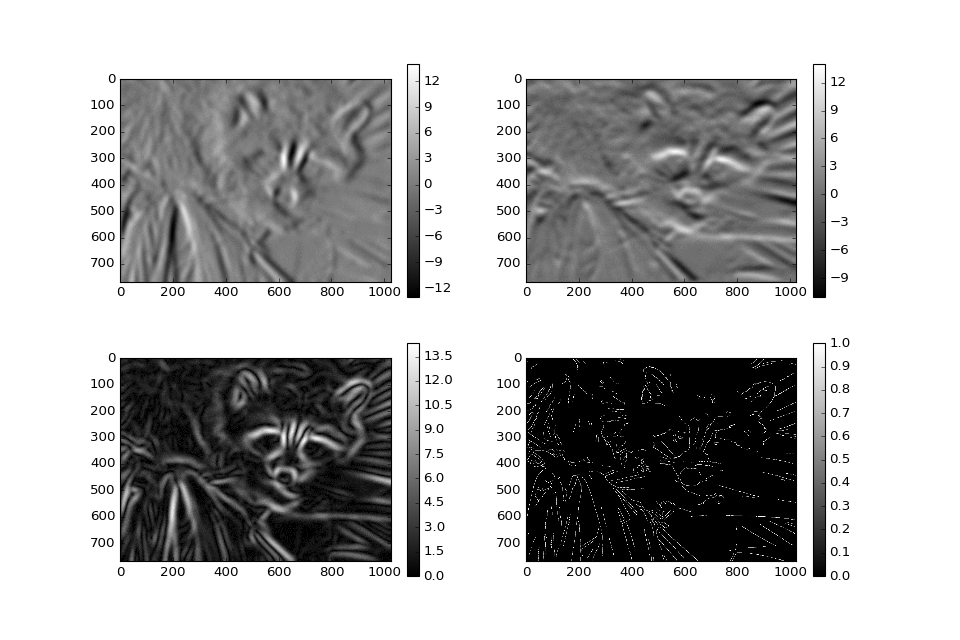

In [5]:
plt.figure(3,figsize = (12, 8))
plt.subplot(221)
plt.imshow(im_dx,cmap="gray")
plt.colorbar()
plt.subplot(222)
plt.imshow(im_dy,cmap="gray")
plt.colorbar()
plt.subplot(223)
plt.imshow(grad,cmap="gray")
plt.colorbar()
plt.subplot(224)
plt.imshow(can,cmap="gray")
plt.colorbar()
plt.show()

# Visualizing image gradients (vector field)

<IPython.core.display.Javascript object>


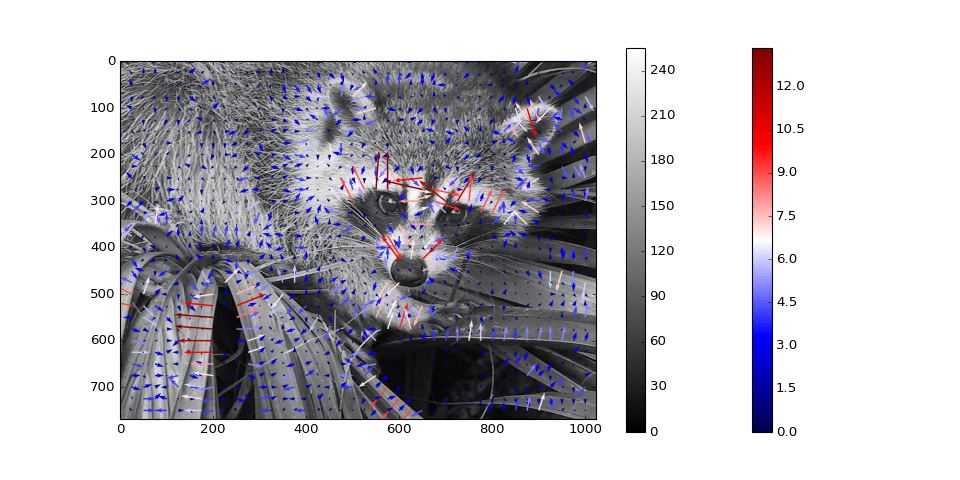

In [6]:
from matplotlib.pyplot import cm

plot = plt.figure(4, figsize = (12,6),facecolor = '0.7')

y, x = np.mgrid[0:im_dx.shape[0],0:im_dx.shape[1]] 

s = 25   # one vector per box of size s*s
plt.quiver(x[::s,::s], y[::s,::s], im_dx[::s, ::s], im_dy[::s, ::s], 
           grad[::s,::s], cmap=cm.seismic, 
           # color = 'b',   # to display vectors in blue only, uncomment this and comment the line above, 
           width = 0.003)
plt.colorbar()                  
plt.imshow(im[:,:,0],cmap="gray")
plt.colorbar()                  
plt.show(plot) 